In [1]:
import pickle

import pandas as pd
import numpy as np

In [2]:
def load_data_from_disk(file):
    with open(file, 'rb') as fid:
        data = pickle.load(fid)
    return data

In [3]:
concat = load_data_from_disk('all_books.pk')
print('Dados:')
display(concat)

Dados:


,Title,Author,Year,Index,Classe,Medidas
0,Beside the Bonnie Brier Bush,Ian Maclaren,1895,1,1,"[0.016870766023970817, 0.5134629202554766, 0.2..."
1,Trilby,George Du Maurier,1895,2,1,"[0.007943628853858884, 0.5080680299438605, 0.1..."
2,The Adventures of Captain Horn,Frank Richard Stockton,1895,3,1,"[0.04249084249084249, 0.5155886357461207, 0.27..."
3,The Manxman,Hall Caine,1895,4,1,"[0.008818128269983714, 0.4963272963753215, 0.2..."
4,The Princess Aline,Richard Harding Davis,1895,5,1,"[0.07058001397624039, 0.5021140306022375, 0.35..."
...,...,...,...,...,...,...
104,Crome Yellow,Aldous Huxley,1921,105,0,"[0.020219314336961395, 0.5307688419361337, 0.2..."
105,Ulysses,James Joyce,1922,106,0,"[0.004957729803725697, 0.6591597862764352, 0.1..."
106,The Love Story of Aliette Brunton,Gilbert Frankau,1922,107,0,"[0.010752392979373708, 0.44053937422011186, 0...."
107,Lady Into Fox,David Garnett,1922,108,0,"[0.0553306342780027, 0.3112910481331534, 0.184..."


# Classificação

### Dados

In [4]:
X = np.array(concat['Medidas'])
X = np.vstack(X) # cria um único array numpy com todas as medidas
print('\nMedidas:\n', X)

y = np.array(concat['Classe']) # classes de sucesso
print("\nClasses de sucesso:\n", y)


Medidas:
 [[0.01687077 0.51346292 0.21447187 0.00866115 0.03273395 0.00328947]
 [0.00794363 0.50806803 0.15548366 0.00395328 0.02121082 0.00196464]
 [0.04249084 0.51558864 0.27463776 0.02413571 0.06300305 0.00952381]
 ...
 [0.01075239 0.44053937 0.21402717 0.00499774 0.02456768 0.00213675]
 [0.05533063 0.31129105 0.18403144 0.0264023  0.1041947  0.02564103]
 [0.0230797  0.57598801 0.25451741 0.01079309 0.03888033 0.00423729]]

Classes de sucesso:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Separa em conjuntos de treinamento e teste

tamanho de test = 25 %

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Número de livros:', len(X))
print('Treino:', len(X_train), )
print('Teste:', len(X_test))

Número de livros: 219
Treino: 164
Teste: 55


## Modelos

In [7]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)  # Calcula a matriz de confusão
        
        
        results[model_name] = {
            'model': model,
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': cm
        }
        
    return results

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn import svm

In [17]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(max_depth=2, random_state=0),
    'SVC': make_pipeline(StandardScaler(), SVC(gamma='auto')), # standarizado
    }

## Resultados

- **Uma matriz de confusão** (confusion matrix) é uma ferramenta importante para avaliar o desempenho de modelos de classificação. Ela mostra a contagem de verdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN).

[[TN  FP]

[FN  TP]]


In [18]:
results = train_and_evaluate_models(X_train, X_test, y_train, y_test, models)

for model_name, result in results.items():
    print(f"Modelo: {model_name}")
    print("Acurácia:", result['accuracy'])
    print("\nRelatório de Classificação:\n", result['classification_report'])
    print("Matriz de Confusão:\n", result['confusion_matrix'])
    print("\n")

Modelo: KNN
Acurácia: 0.6545454545454545

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.59      0.64        29
           1       0.61      0.73      0.67        26

    accuracy                           0.65        55
   macro avg       0.66      0.66      0.65        55
weighted avg       0.66      0.65      0.65        55

Matriz de Confusão:
 [[17 12]
 [ 7 19]]


Modelo: Random Forest
Acurácia: 0.45454545454545453

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.48      0.41      0.44        29
           1       0.43      0.50      0.46        26

    accuracy                           0.45        55
   macro avg       0.46      0.46      0.45        55
weighted avg       0.46      0.45      0.45        55

Matriz de Confusão:
 [[12 17]
 [13 13]]


Modelo: SVC
Acurácia: 0.5454545454545454

Relatório de Classificação:
               precision    recall  f1-

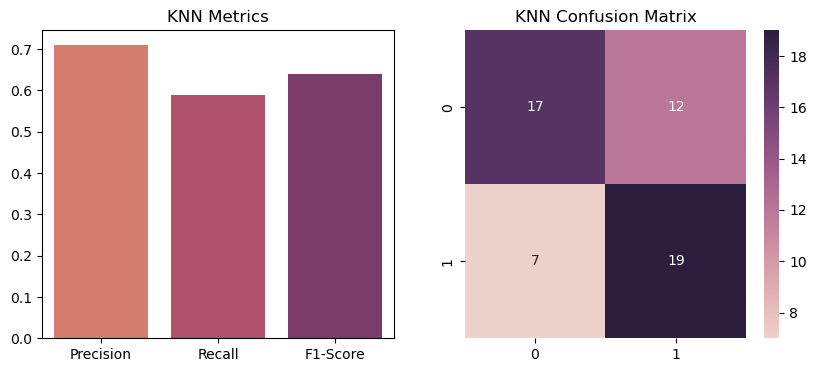

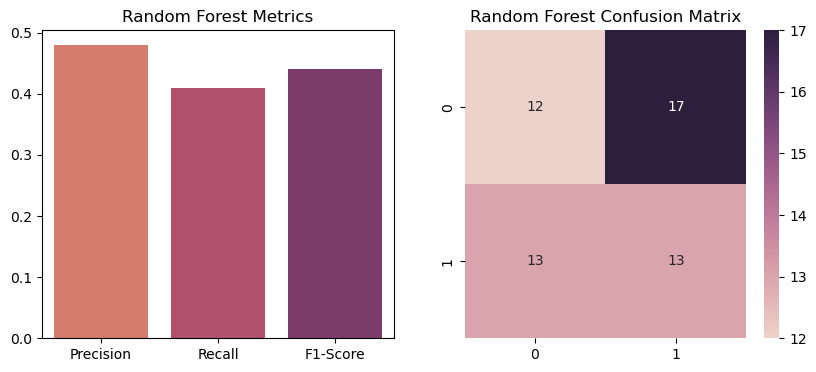

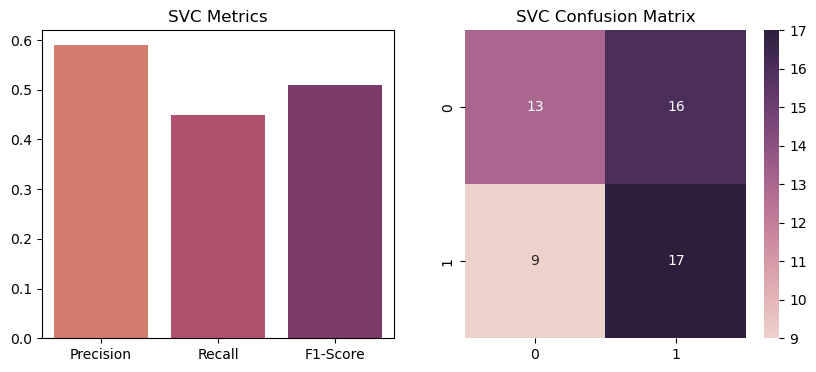

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_results(results):
    for model_name, result in results.items():

        report_lines = result['classification_report'].split('\n')
        precision, recall, f1_score, _ = map(float, report_lines[2].split()[1:])
        
        # Extrai a matriz de confusão
        cm = result['confusion_matrix']
        
        # Cria um gráfico para visualizar as métricas
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision, recall, f1_score], palette="flare")
        plt.title(f"{model_name} Metrics")
        
        # Cria um gráfico para a matriz de confusão
        plt.subplot(1, 2, 2)
        sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
        plt.title(f"{model_name} Confusion Matrix")
        
        plt.savefig('metrics/' + model_name + '.png', dpi=300, bbox_inches='tight')
        plt.show()

plot_results(results)


In [23]:
!pip install tabulate

- Tabela em formato Latex

In [38]:
from tabulate import tabulate

# Dicionário para armazenar as métricas de todos os modelos
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }

# Imprime a tabela LaTeX
print("\\begin{table}[]")
print("\\begin{tabular}{lcccccccccc}")
print("Modelo & Acurácia  & \\multicolumn{2}{c}{Precisão} & \\multicolumn{2}{c}{Recall} & \\multicolumn{2}{c}{F1-Score} & \\multicolumn{2}{c}{Support} \\\\")
print("\\hline")
print("      &     & 1            & 0           & 1             & 0             & 1             & 0            &  1   & 0 \\\\ ")
for model_name, result in results.items():
    accuracy = result['accuracy']
    report = result['report']
    
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_score_0 = report['0']['f1-score']
    support_0 = report['0']['support']
    
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_score_1 = report['1']['f1-score']
    support_1 = report['1']['support']
    
    print(f"{model_name} & {accuracy:.2f} & {precision_1:.2f} & {precision_0:.2f} & {recall_1:.2f} & {recall_0:.2f} & {f1_score_1:.2f} & {f1_score_0:.2f} & {int(support_1)} & {int(support_0)} \\\\")
    
print("\\end{tabular}")
print("\\end{table}")


\begin{table}[]
\begin{tabular}{lcccccccccc}
Modelo & Acurácia  & \multicolumn{2}{c}{Precisão} & \multicolumn{2}{c}{Recall} & \multicolumn{2}{c}{F1-Score} & \multicolumn{2}{c}{Support} \\
\hline
      &     & 1            & 0           & 1             & 0             & 1             & 0            &  1   & 0 \\ 
KNN & 0.65 & 0.61 & 0.71 & 0.73 & 0.59 & 0.67 & 0.64 & 26 & 29 \\
Random Forest & 0.45 & 0.43 & 0.48 & 0.50 & 0.41 & 0.46 & 0.44 & 26 & 29 \\
SVC & 0.55 & 0.52 & 0.59 & 0.65 & 0.45 & 0.58 & 0.51 & 26 & 29 \\
\end{tabular}
\end{table}
